# Project description
> Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones. Our maing goal to :
- Predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
- Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
- Additionally, measure the AUC-ROC metric and compare it with the F1.

In [35]:
#Import our Packages
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import random
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = "svg"

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, classification_report, confusion_matrix,roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Step 1. Data preprocessing:
- Download  data.
- Prepare the data for further analyzing.
- Exploration data analyzing 

**Step 1.1. Download data**

In [2]:
#load our data set 
ds = pd.read_csv('Churn.csv')
print(ds.shape)
print(ds.info())

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [3]:
#looking what we have
ds.sample(5)

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
9079       9080    15730488    Richmond          516     Spain  Female   27   
2936       2937    15671766   Enyinnaya          599    France    Male   44   
8294       8295    15569430     Burrows          704     Spain  Female   36   
7485       7486    15744423       Cocci          561    France    Male   32   
1540       1541    15605950  Onwuamaeze          530   Germany    Male   23   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9079     1.0       0.00              1          0               1   
2936    10.0  118577.24              1          1               1   
8294     2.0  175509.80              2          1               0   
7485     5.0       0.00              2          1               0   
1540     1.0  137060.88              2          1               1   

      EstimatedSalary  Exited  
9079        112311.15       0  
2936         31448.52       0  
8294        152039.67       0  
7485         84871.99       0  
1540        165227.23       0

**Step 1.2. Data preparation process**

In [4]:
#checking for missing values
ds.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

- First, let's work with our missing values in the variable "Tenure" which represents a period of maturation for a customer’s fixed deposit (years).

In [5]:
#Looking of what spectre of values we have in our Tenure column
print(ds['Tenure'].unique())
print(ds['Tenure'].value_counts())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64


- I propose dropping those missing values because our primary goal is to create a model with the highest accuracy. If we change or add some information, we can change lvl of correlation between variables and provide some difficulty of calculation scores.

In [6]:
#Drop our missing values
ds = ds.dropna()
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Checking if we have duplicates in our data
ds.duplicated().sum()

0

In [8]:
#Changin our object type to string type 
column = ['Surname','Geography', 'Gender']
def convert_to_str(data,column):
    for col in column:
        data[col] = data[col].astype('string')
    return data
ds = convert_to_str(ds,column)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   string 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   string 
 5   Gender           9091 non-null   string 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), string(3)
memory usage: 1.0 MB


- Now we can start analyzing our data and checking what we have there

**Step 1.3. Making data analysis**

In [9]:
#Describing our dataset
ds.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  9091.000000  9.091000e+03  9091.000000  9091.000000  9091.000000   
mean   5013.909911  1.569105e+07   650.736553    38.949181     4.997690   
std    2884.433466  7.161419e+04    96.410471    10.555581     2.894723   
min       1.000000  1.556570e+07   350.000000    18.000000     0.000000   
25%    2521.500000  1.562899e+07   584.000000    32.000000     2.000000   
50%    5019.000000  1.569106e+07   652.000000    37.000000     5.000000   
75%    7511.500000  1.575285e+07   717.000000    44.000000     7.000000   
max    9999.000000  1.581566e+07   850.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9091.000000    9091.000000  9091.000000     9091.000000   
mean    76522.740015       1.530195     0.704983        0.515565   
std     62329.528576       0.581003     0.456076        0.499785   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     97318.250000       1.000000     1.000000        1.000000   
75%    127561.890000       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     1.000000        1.000000   

       EstimatedSalary       Exited  
count      9091.000000  9091.000000  
mean     100181.214924     0.203938  
std       57624.755647     0.402946  
min          11.580000     0.000000  
25%       51227.745000     0.000000  
50%      100240.200000     0.000000  
75%      149567.210000     0.000000  
max      199992.480000     1.000000

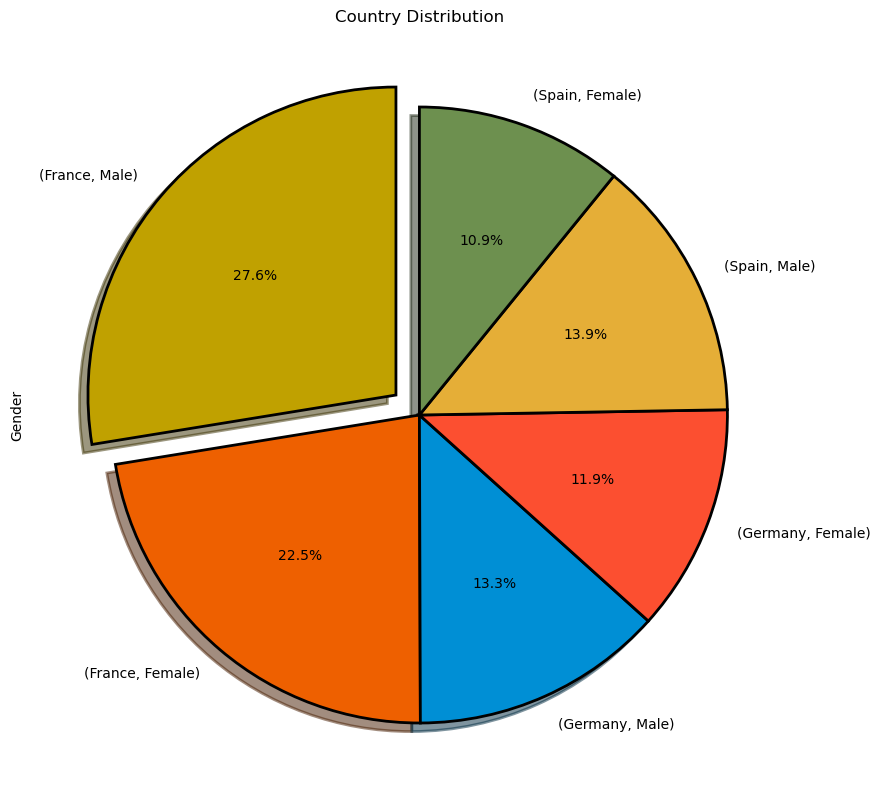

In [10]:
#Creating a pie chart to show what kind of gender distribution we have by each of the countries

colors = ['#c0a100','#ee6000','#008fd5','#fc4f30','#e5ae37','#6d904f']
explode = [0.1, 0, 0, 0, 0, 0]
ds.groupby('Geography')['Gender'].value_counts().plot.pie(explode = explode, shadow = True, colors = colors, startangle = 90,
                                                         wedgeprops = {"edgecolor" : "black",'linewidth': 2,
                                                                       'antialiased': True},
                                                         autopct='%1.1f%%',figsize=(10,10),title= "Country Distribution");


>Conclusion: By our pie chart we can say that most of our clients are citizens of **France** and belong to **Male** class.

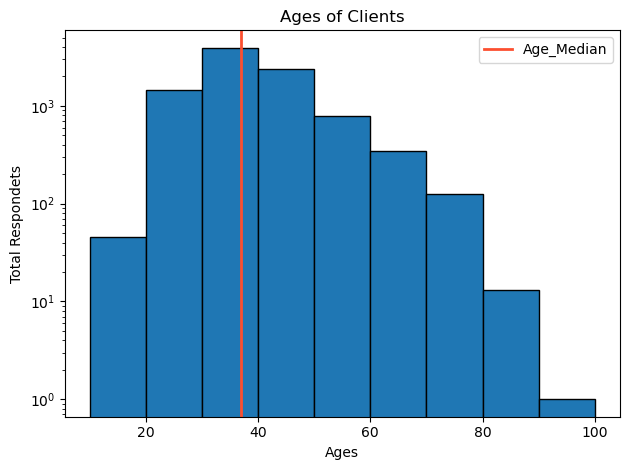

In [11]:
#showing what kind of age distribution we have in our "Age" column
ages_clients = ds['Age']
bins = [10,20,30,40,50,60,70,80,90,100]
median_age = ages_clients.median()
plt.hist(ages_clients, bins=bins, edgecolor = 'black', log=True)
color = "#fc4f30"
plt.axvline(median_age, color=color, label="Age_Median", linewidth=2)
plt.legend()
plt.title("Ages of Clients")
plt.xlabel('Ages')
plt.ylabel('Total Respondets')
plt.tight_layout()

>Conclusion: Here we can see that age of the highest number of clients lies between **30-40 year**, and median age of all of our clients equal to **38**.

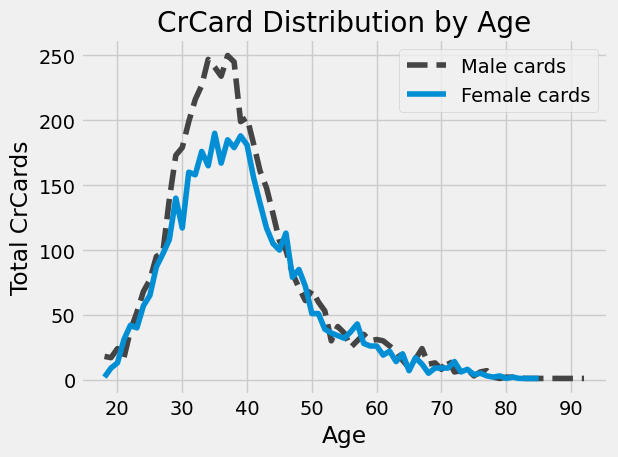

In [12]:
#Let's check how many Credits has  each of our Gender types is distributed by age 
plt.style.use("fivethirtyeight")
male =ds.query('Gender == "Male"').groupby('Age')['HasCrCard'].count()
female = ds.query('Gender == "Female"').groupby('Age')['HasCrCard'].count()
plt.plot(male,color="#444444",linestyle="--",label ="Male cards")
plt.plot(female,label='Female cards')
plt.legend()
plt.title("CrCard Distribution by Age")
plt.xlabel('Age')
plt.ylabel('Total CrCards')
plt.tight_layout()

>Conclusion: From our plot lines, we can make a conclusion that the higher number of credit cards belong to the **Male** with an age range between 30-40 year.

In [13]:
# Make a pivot table that will represent how our "Creditscore" number distributed by each country group by "Gender"
ds_upd = ds.pivot_table(index='Geography', columns='Gender', values='CreditScore', \
                               aggfunc='sum')
#check the result
cm = sns.light_palette("green", as_cmap=True)
ds_upd.style.background_gradient(cmap=cm)

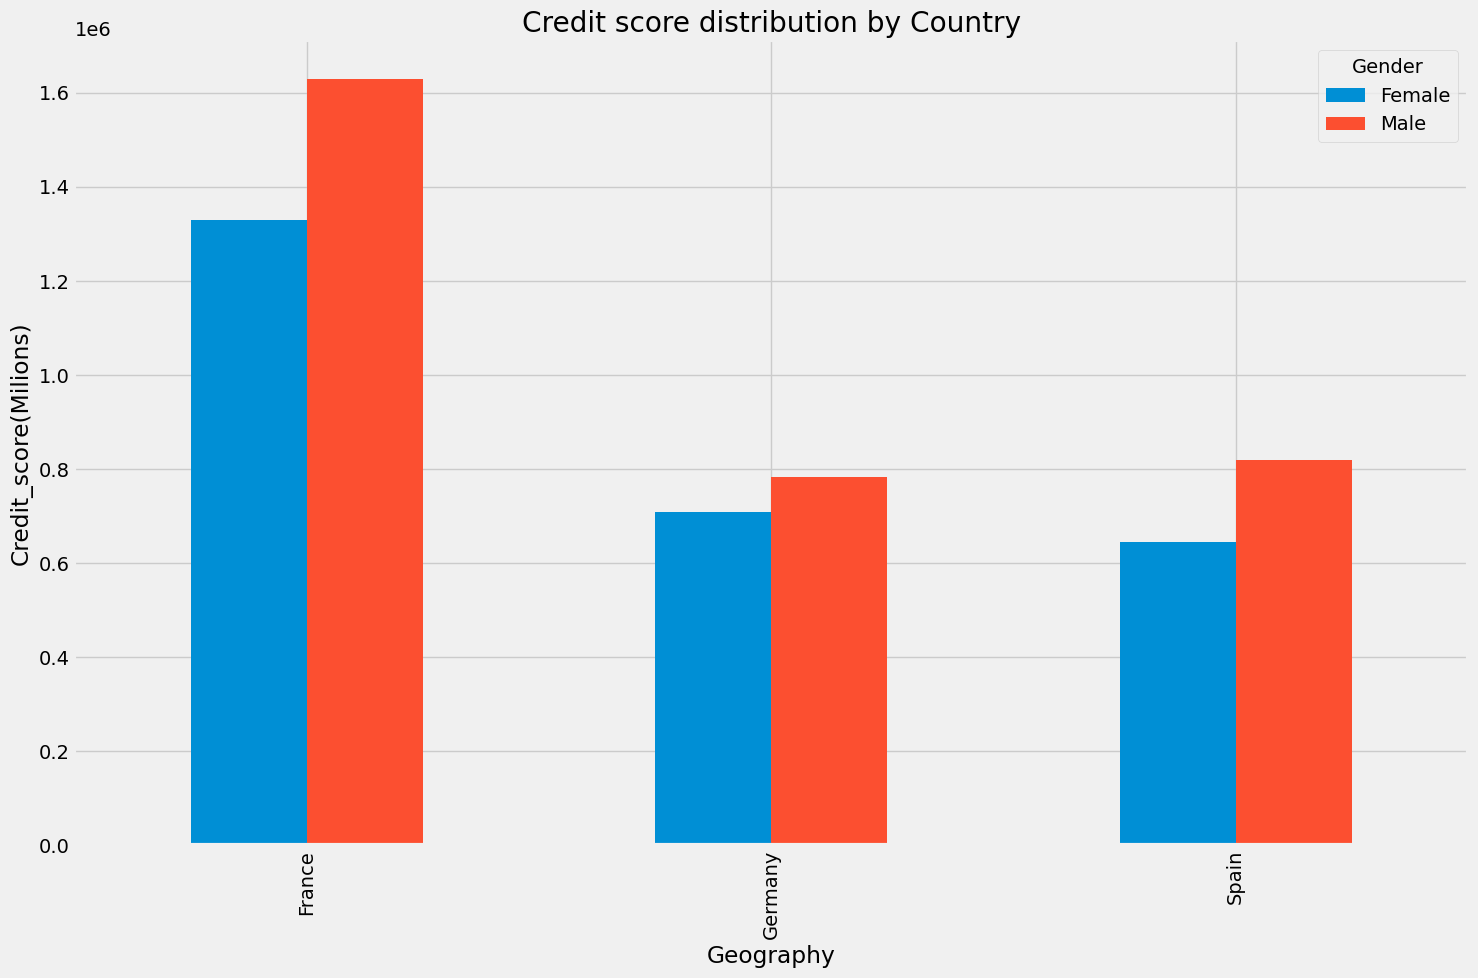

In [14]:
#Making a bar graph to show our distribution

ds_upd.plot.bar(figsize=(15,10),grid=True);
plt.ylabel('Credit_score(Milions)')
plt.title('Credit score distribution by Country')
plt.tight_layout()


>Conclusion: As we said in the previous graph that we have most of our clients are from **France**, which is why in our bar plot we can see that the higher number of credit scores belong to clients from **France**, but from our bar plot, we can clearly say that **Males** has a bigger number of Credit score than **Females**.

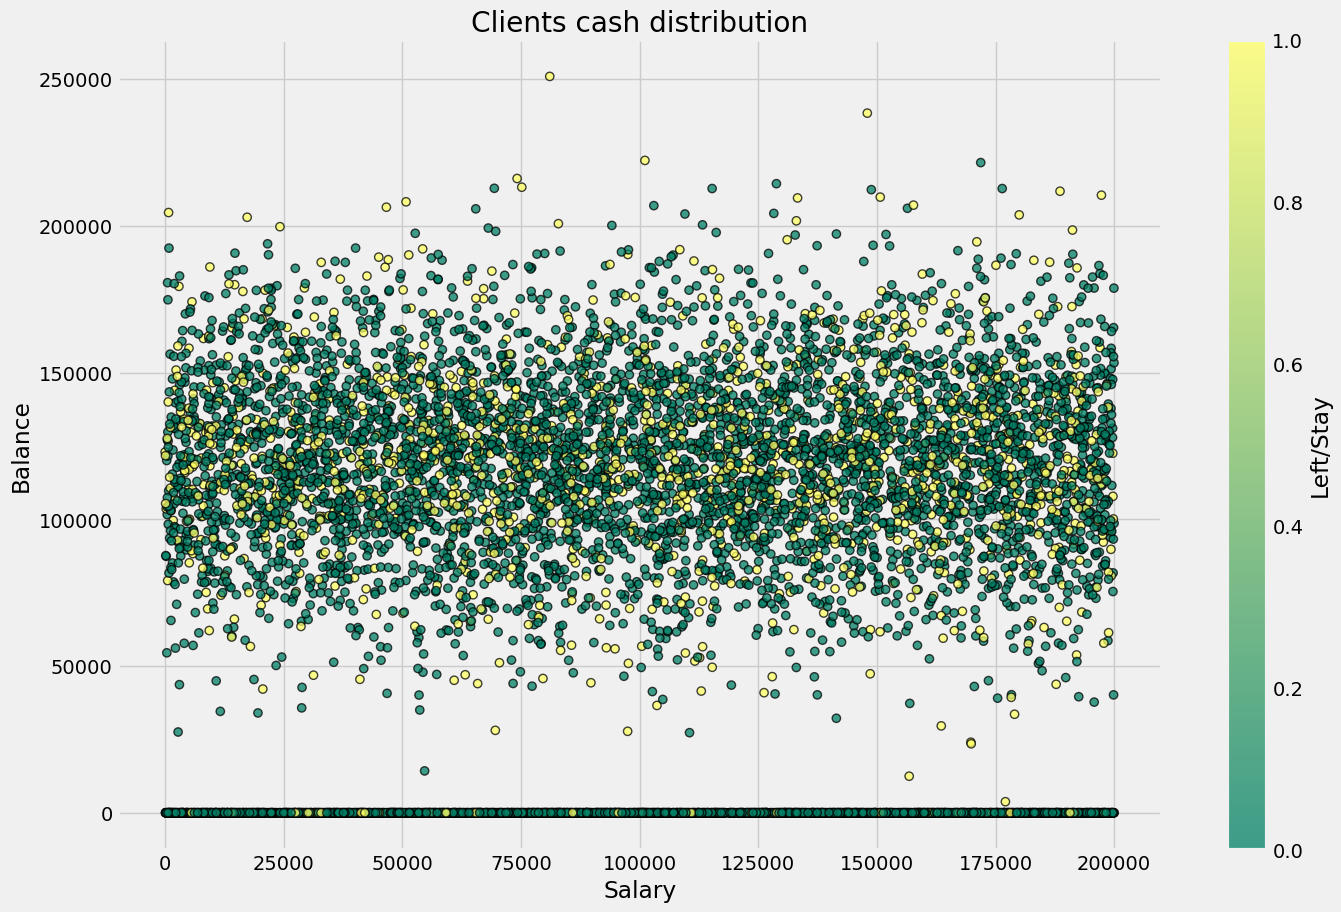

In [15]:
#Creating scatter plots that will show how leaving the bank depends on salary and account balance
salary =ds['EstimatedSalary']
balance = ds['Balance']
Exited = ds['Exited']
plt.figure(figsize=(15,10))
plt.scatter(salary,balance,c=Exited,cmap='summer',edgecolor='black',linewidth=1,alpha=0.75)
cbar= plt.colorbar()
cbar.set_label('Left/Stay')
plt.title('Clients cash distribution')
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.show()

>Conclusion: Our scatterplot doesn't provide us with any necessary information on f what variables provide the higher impact on chose of our clients to stay or leave our bank, depending on their salary and balance account. For solving that problem we will call correlation further in the next step.

In [16]:
#Creating function that will plot boxplot with necessary information
def boxplot(data,column,target):
    plt.style.use("seaborn-deep")
    fig, axs = plt.subplots(1, 1, figsize=(8,8) )
    sns.boxplot(data=data, x=column, y=target, hue='Gender',palette='tab10',medianprops={"color": "coral"}, showfliers=False, ax=axs)
    axs.set_xlabel(column, fontsize=14)
    plt.show()
    
#Now let's check the balance and  estimated salary distribution by our genders

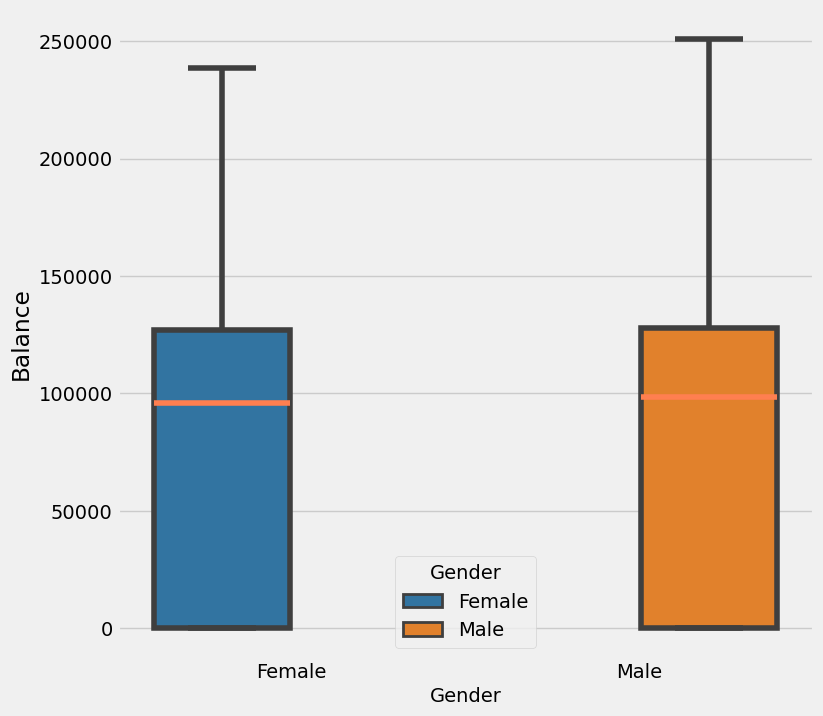

In [17]:
boxplot(ds,'Gender','Balance')

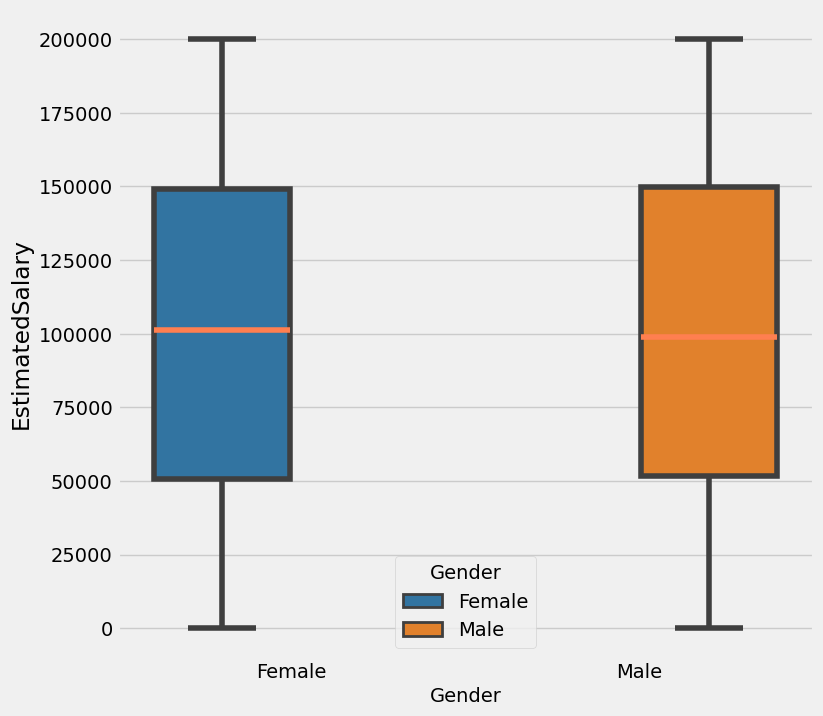

In [18]:
boxplot(ds,'Gender','EstimatedSalary')

>Conclusion: From our boxplot, we did not see a big significant difference between the salary and balance accounts of our Genders, but our **Males** have a bit more money than **Females** on their balance accounts, but in another way, our **Females** have a higher salary than a **Males**. Can we say that **Males** are more thrifty?

In [19]:
#Let's work with our Tenure variable and see what we have there inside
ds['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [20]:
#Creating a pivot table group by Countries and showing us the main parameters from the "Tenure" column
Tenure_dist = ds.pivot_table(index='Geography', values='Tenure',aggfunc=['median','mean','min','max'])
cm = sns.light_palette("red", as_cmap=True)
Tenure_dist.style.background_gradient(cmap=cm)

> Conclusion: We can say that the estimated average time for the period of maturation for a customer’s fixed deposit (years) is equal to **5** years. Let's add some visualization to show if our tenure depends on age and gender.

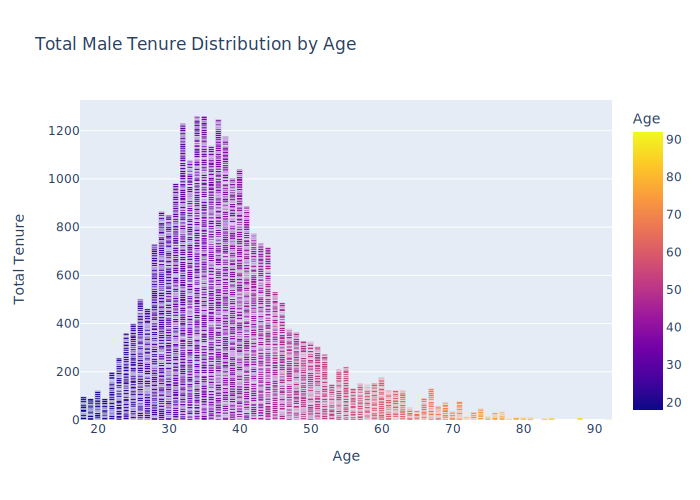

In [21]:
male_tenure = ds.query('Gender == "Male"')
fig = px.bar(male_tenure, x='Age', y= 'Tenure',
              barmode = 'group', color = 'Age',
             labels={'Tenure':'Total Tenure'},title='Total Male Tenure Distribution by Age')
fig.show()

> Conclusion: From the last graph, we can see that the longest get-back credits have **males** belonging to the groups aged between 30 - 40 years.

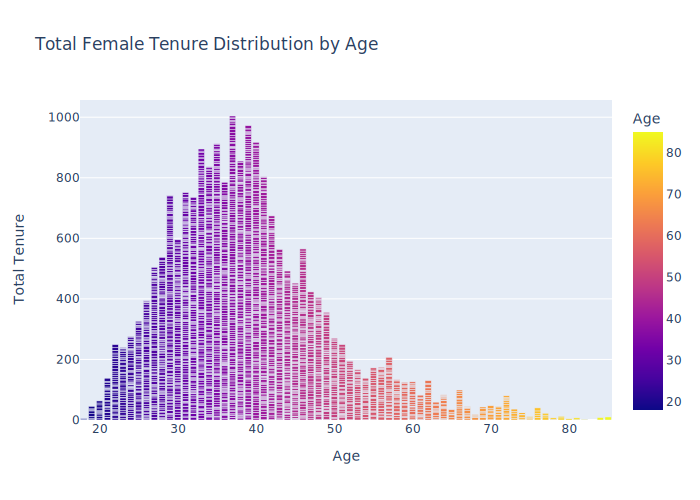

In [22]:
male_tenure = ds.query('Gender == "Female"')
fig = px.bar(male_tenure, x='Age', y= 'Tenure',
              barmode = 'group', color = 'Age',
             labels={'Tenure':'Total Tenure'},title='Total Female Tenure Distribution by Age')
fig.show()

> Conclusion: From previous graph, we can see that the longest get-back credits have **females** belonging to the groups aged between 33 - 43 years.

- In the last, I propose to find out from what variables the choice of our clients to leave the bank is higher depending.

In [23]:
#Making a new dataset that will provide us opportunity for calculation correlation
ds_new = ds.drop('Surname', axis=1)

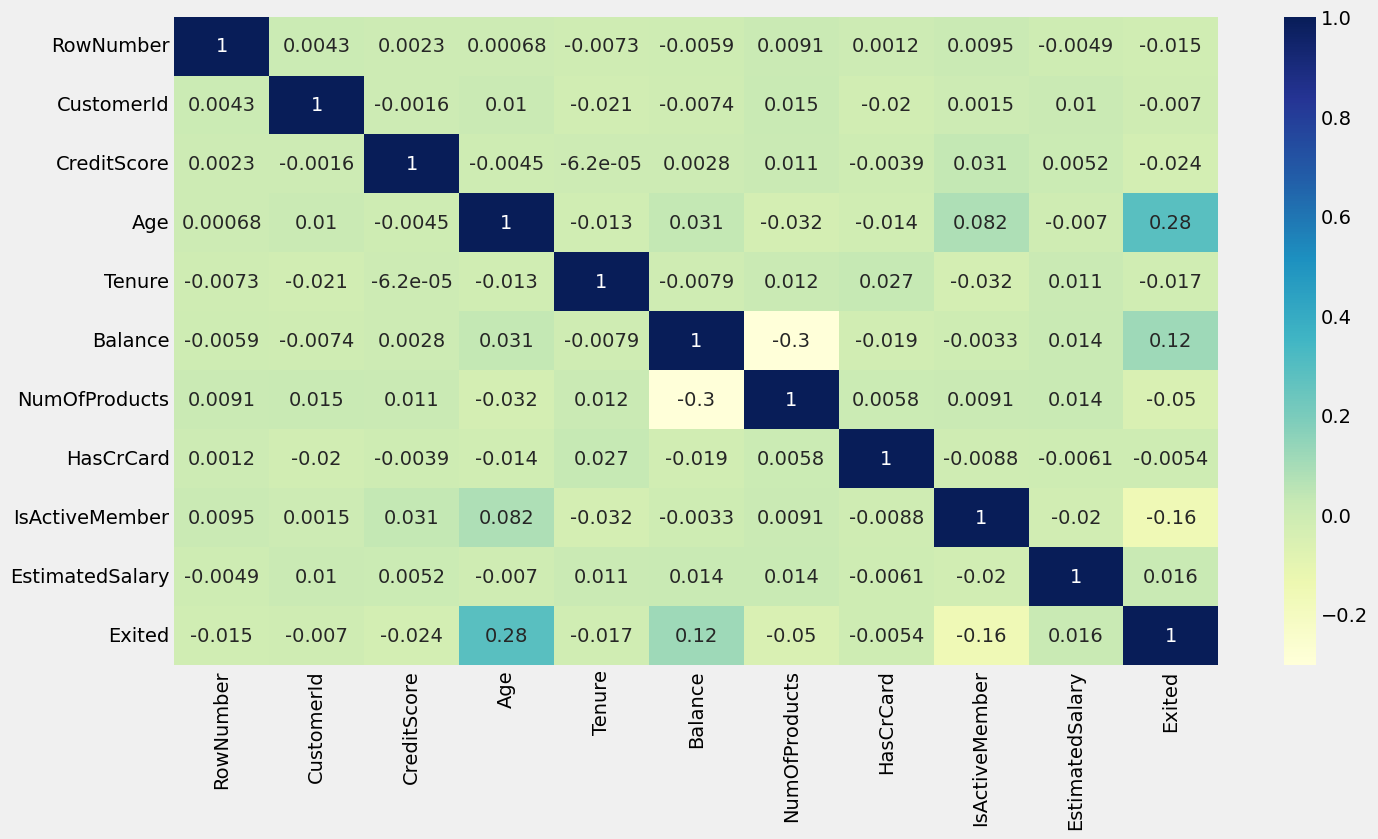

In [24]:
#Plotting heatmap of correlation of our dataset
plt.figure(figsize = (15,8))
sns.heatmap(ds_new.corr(),annot=True,cmap="YlGnBu");

>Conclusion: From the last table, we can't clearly say, from what variables depend on our  **Exited** variable which represents if the customer left our still staying in our Bank, but we can see that the **Age** correlation value has the biggest number which means it's still has a little decency between **Age** variable and **Exited**.

 # Step 2.
 - Train the model without taking into account the imbalance. Briefly describe your findings.

**Step 2.1. First, we need to drop all unnecessary columns that can provide miss understanding of working our model and without them, we can work and test our models, then we need to use the encoding technique, one that keeps all the information about the original variable in one feature, for this, we will replace the categories with arbitrary numeric labels by using Ordinal Encoding. That will provide to us to encode categorical features for decision trees and other tree-based algorithms, like random forests.**

In [25]:
#Dropping all unnecessary columns, that we will not need in the next steps
data = ds.drop(['RowNumber','Surname','CustomerId'],axis=1)

In [26]:
#Create an instance of this class.
encoder = OrdinalEncoder() 
#Fitting and Transforming our data set, and creating a new one
data_ordinal = pd.DataFrame(encoder.fit_transform(data), 
                                                      columns=data.columns)
data_ordinal.sample(5)

CreditScore  Geography  Gender   Age  Tenure  Balance  NumOfProducts  \
5784        285.0        2.0     0.0  22.0     4.0   2438.0            0.0   
6046        290.0        1.0     0.0  17.0     1.0   3898.0            1.0   
6711        254.0        2.0     1.0  15.0     7.0   3022.0            1.0   
8354        380.0        2.0     1.0  33.0     4.0      0.0            1.0   
7012        457.0        0.0     0.0  17.0     2.0   3623.0            3.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
5784        1.0             0.0            764.0     0.0  
6046        0.0             0.0           8459.0     0.0  
6711        1.0             0.0           3470.0     0.0  
8354        0.0             0.0           5618.0     1.0  
7012        1.0             0.0           3390.0     1.0

>Conclusion: After we ensure that all worked properly we can move on to the next step.

**Step 2.2. In this step, we will create a feature and target set and divide our data into training and validation sets. And working with the Feature Scaling method because we know that we have some columns with values only 0, and 1. Another column like "Age" from 0 to 100, and column "EstimatedSalary" with higher magnitudes of values and dispersion, which means that the algorithm will find the "EstimatedSalary" feature to be more important than Age and another one. We don't want that. All features should be considered equally important before the algorithm's execution. One of the ways to scale the features is to standardize the data.**

In [27]:
#Creating our sets.
target_ord = data_ordinal['Exited']
features_ord = data_ordinal.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_ord, target_ord, test_size=0.25, random_state=12345
)

print(features_train.shape)
print(features_valid.shape)
print(target_train.shape)
print(target_valid.shape)


(6818, 10)
(2273, 10)
(6818,)
(2273,)


In [28]:
#Standardisizing our variables by calling the StandardScaler method
#Creating a list with necessary columns
numeric = ['Age', 'Tenure', 'Balance', 'EstimatedSalary']

#Working with method
scaler= StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_train.head()

CreditScore  Geography  Gender       Age    Tenure   Balance  \
1349        156.0        1.0     0.0  0.375356 -0.681448  1.150495   
6740        285.0        0.0     1.0 -0.096643 -0.681448 -0.959908   
6816        152.0        1.0     1.0 -0.191042  1.384103 -0.355680   
5145        147.0        2.0     1.0 -1.040639  1.039844 -0.959908   
6678        210.0        0.0     1.0  0.092157 -0.337189 -0.123603   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
1349            0.0        1.0             0.0        -1.620430  
6740            1.0        1.0             0.0        -0.596722  
6816            1.0        0.0             1.0         0.085370  
5145            1.0        0.0             0.0         1.670846  
6678            1.0        1.0             1.0        -1.071568

**Step 2.3. Now we can start working with algorithms, training them, and calculate the accuracy from each of them. We will choose the better hyperparameters for each model, this will help us to improve the accuracy level of our models.**

Accuracy of the best model: 0.8596568411790585 and best_depth: 6


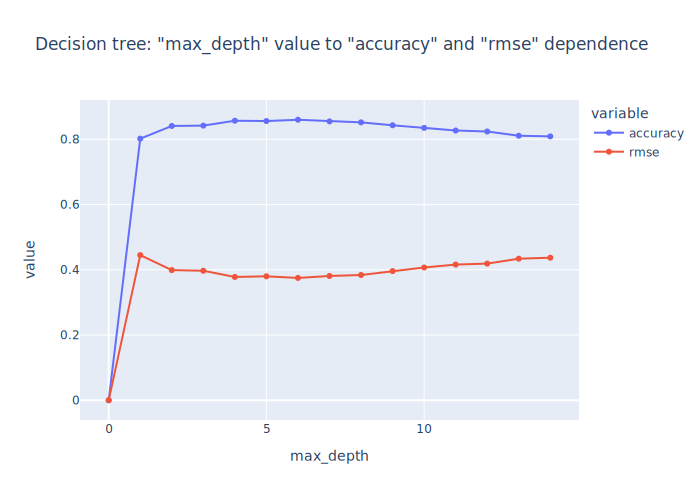

In [29]:
#Let's start with DecisionTree model
#Creating our loop with number of leaves(depth) from 1 to 15
best_model = None
best_result = 0
#Creating our dataset which will cointain our result values
result_df = pd.DataFrame({'max_depth': [0], 'accuracy': [0], 'rmse': [0]})
for depth in range(1, 15):   
    model_Tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model_Tree.fit(features_train,target_train) # train the model
    predictions_valid = model_Tree.predict(features_valid) # get the model's predictions
    result = accuracy_score(target_valid,predictions_valid) # calculate the accuracy
    mse = mean_squared_error(target_valid, predictions_valid) ** 0.5 # calculate the mse
    result_df.loc[depth] = (depth, round(result, 3), round(mse, 3)) # put our result in the table
    if result > best_result:
        best_depth = depth
        best_result = result
        
           
print("Accuracy of the best model:", best_result,'and best_depth:',best_depth)

# Plotting our results
fig = px.line(result_df, x='max_depth', y=['accuracy', 'rmse'], markers=True,
              title='Decision tree: "max_depth" value to "accuracy" and "rmse" dependence')
fig.show()

Accuracy of the best model on the validation set (n_estimators = 14): 0.8666959964804224, with max_depth:10


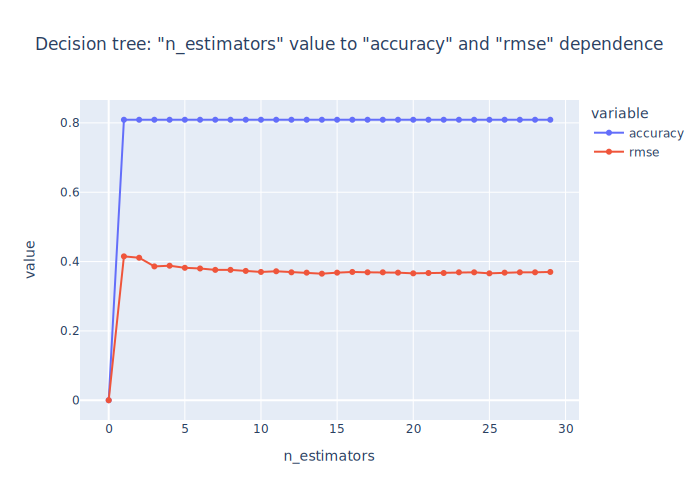

In [65]:
#RandomForest model 
#Creating our loop for testing our model
best_score = 0
best_est = 0
result_df = pd.DataFrame({'n_estimators': [0], 'accuracy': [0], 'rmse': [0]})
for est in range(1, 30):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est,max_depth=depth) # set number of trees
        model_forest.fit(features_train,target_train)
        predictions_valid = model_forest.predict(features_valid)
        score = model_forest.score(features_valid,target_valid) # calculate accuracy score on validation set
        mse = mean_squared_error(target_valid, predictions_valid) ** 0.5
        result_df.loc[est] = (est, round(result, 3), round(mse, 3)) # put our result in the table
        if score > best_score:
            best_score = score  # save best accuracy score on validation set
            best_est = est# save number of estimators corresponding to best accuracy score
            best_depth = depth
        
print("Accuracy of the best model on the validation set (n_estimators = {}): {}, with max_depth:{}".format(best_est, best_score,best_depth))        
# Ploting our results
fig = px.line(result_df, x='n_estimators', y=['accuracy', 'rmse'], markers=True,
              title='Decision tree: "n_estimators" value to "accuracy" and "rmse" dependence')
fig.show()

In [31]:
#Creating our Model
model_log = LogisticRegression(random_state=54321, solver='liblinear') 
model_log.fit(features_train,target_train)  # train model on training set
#Here I propose to test accuracy score to our validation set and train set 
logreg_valid = model_log.score(features_train,target_train)
logreg_test = model_log.score(features_valid,target_valid)

#Printing the result

print(
    "Accuracy of the logistic regression model on the training set:",
    logreg_valid,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    logreg_test,
)

Accuracy of the logistic regression model on the training set: 0.8028747433264887
Accuracy of the logistic regression model on the validation set: 0.8077430708315002


In [32]:
#Our samples
features_svc = features_train[:500]
target_svc = target_train[:500]

#Creating our Model SVM
parameters = {'kernel': ('linear','rbf'), 'C':[0.1, 1, 8, 16, 32]}

svc = svm.SVC()
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(features_svc,target_svc)
print(clf.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [33]:
# Naive Bayes model
gnb = GaussianNB()
gnb.fit(features_train,target_train)
score = gnb.score(features_valid,target_valid) 
print('The lvl of accuracy is equal to:{}'.format(score))
y_pred = gnb.predict(features_valid)
print("Number of mislabeled points out of a total %d points : %d" % (features_valid.shape[0], (target_valid != y_pred).sum()))

The lvl of accuracy is equal to:0.829300483941927
Number of mislabeled points out of a total 2273 points : 388


In [36]:
# MultinomialNB model
scaler = MinMaxScaler()
X_train = scaler.fit_transform(features_train)
X_test = scaler.transform(features_valid)
mnb =  MultinomialNB()
mnb.fit(X_train ,target_train)
score = mnb.score(X_test,target_valid) 
print('The lvl of accuracy is equal to:{}'.format(score))
y_pred = mnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (target_valid != y_pred).sum()))

The lvl of accuracy is equal to:0.8015838099428069
Number of mislabeled points out of a total 2273 points : 451


> Conclusion: The highest rate of accuracy has the RandomForest algorithm which is equal to **87%**. After we calculated and found what of our models can bring us a higher level of accuracy we can go deeper and work with our Imbalance, to make our models work better and properly. 

# Step 3.
**Step 3.1. Now we must check what kind of class balance we have here in our data sets. Here we will work with different methods of solving our imbalance classes to check what type of method will bring us a higher level of accuracy in our models.**

0.0    7237
1.0    1854
Name: Exited, dtype: int64


<AxesSubplot:ylabel='Exited'>

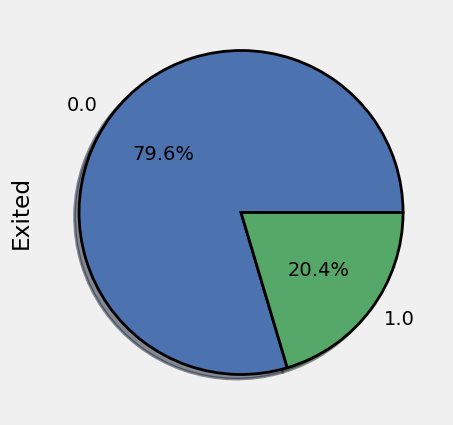

In [68]:
#First, let's check do we really have an imbalance between the two classes
print(target_ord.value_counts())
target_ord.value_counts().plot.pie(shadow = True, wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True},
                                                         autopct='%1.1f%%',figsize=(5,5))

>Conclusion: From the previous picture, we can see that most of our values belong to the 0 class which provide an imbalance in our data, that is why we need to rebalance our values and make our models work for both class equally. Let's start with **UnderSampling** method.

In [38]:
#Making our "Majority" class equal to the "Minority" by using the Undersampling method
ds_class_0 = data_ordinal[data_ordinal['Exited'] == 0]
ds_class_1 = data_ordinal[data_ordinal['Exited'] == 1]

count_class_0,count_class_1 = data_ordinal.Exited.value_counts()
ds_class_0_under = ds_class_0.sample(count_class_1)


ds_test_under = pd.concat([ds_class_0_under,ds_class_1],axis=0)
ds_test_under.Exited.value_counts()

0.0    1854
1.0    1854
Name: Exited, dtype: int64

- Now after we make all preparation we can start working with our models, first, we need to split our data then train our models with new variables, and after will check what kind of scores we will have. But after splitting to our datasets, we need to make all variables equal means we need to standardize them

In [39]:
#Creating our "Training" and "Validation" data sets
target = ds_test_under['Exited']
features = ds_test_under.drop('Exited', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=target
)

y_train.value_counts()

1.0    1391
0.0    1390
Name: Exited, dtype: int64

- Well done!, let's move on and standartize our data make each variable be equal to our models.

In [40]:
#List of variables which we will standardize
numeric = ['Age', 'Tenure', 'Balance', 'EstimatedSalary']
# For this task, we will create a function that will provide our work a bit easier for the next steps
def standart(X_train,X_valid,numeric):
    scaler= StandardScaler()
    scaler.fit(X_train[numeric])
    X_train[numeric] = scaler.transform(X_train[numeric])
    X_valid[numeric] = scaler.transform(X_valid[numeric])
    return X_train, X_valid

In [41]:
#Using our function
X_train, X_valid = standart(X_train,X_valid,numeric)
X_train.sample(5)

CreditScore  Geography  Gender       Age    Tenure   Balance  \
8702        457.0        0.0     0.0 -1.223105  1.366923 -1.021203   
917         235.0        0.0     1.0 -0.758082  0.340716 -1.021203   
1595        421.0        0.0     0.0  0.636986  0.682785 -1.021203   
5960        259.0        1.0     0.0  0.543981 -1.711698  0.761290   
4019        273.0        1.0     0.0  0.822995  0.682785  0.058408   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
8702            1.0        1.0             1.0         1.134073  
917             1.0        0.0             0.0         1.479651  
1595            1.0        1.0             1.0         0.586971  
5960            1.0        1.0             1.0        -1.064678  
4019            0.0        1.0             1.0         0.713786

>Conclusion: Now that we finished all our preparations we can start working with our models. In previous steps, we found what models have the highest rate of accuracy, and what hyperparameters we need to use to get those scores. First, let's start with the **DecisionTree** model.

In [42]:
model_Tree_under = DecisionTreeClassifier(random_state=12345, max_depth=6) # creating a model with the given depth
model_Tree_under.fit(X_train,y_train) # train the model
y_predict_under = model_Tree_under.predict(X_valid) # get the model's predictions
print(classification_report(y_valid,y_predict_under))# cheking the scores


              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       464
         1.0       0.73      0.78      0.75       463

    accuracy                           0.75       927
   macro avg       0.75      0.75      0.75       927
weighted avg       0.75      0.75      0.75       927



In [43]:
#Creating our confusion matrix
def conf_matrix(y_valid,predict):
    cm = confusion_matrix(y_valid,predict,labels=[0,1])
    print('Confusion Matrix')
    sns.heatmap(cm,cmap='Greens',annot = True,
               cbar_kws = {"orientation":"vertical",
                          "label":"color bar"},
               xticklabels = [0,1],yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix")
    plt.show()

Confusion Matrix


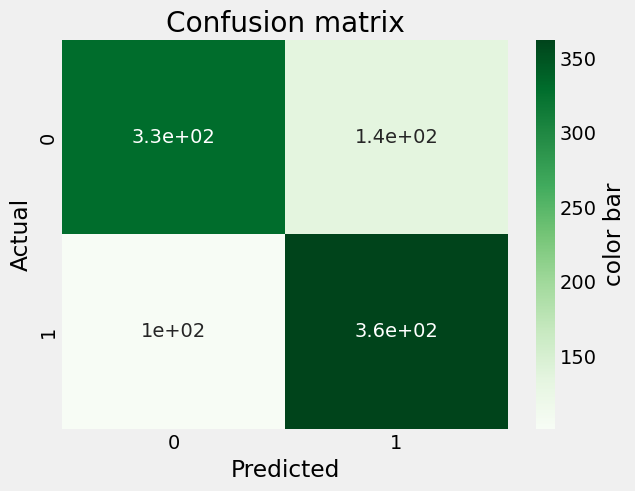

In [44]:
#plotting our matrix
conf_matrix(y_valid,y_predict_under)

>Conclsuion: From the previous model, we can say that we have a good score for both class, and our confusion matrix shows us that most of our values predicted right. Let's move on the next model **RandomForest**.

In [45]:
#Random forest with right hyperparameters which we found in the previous step
model_forest_under = RandomForestClassifier(random_state=54321, n_estimators=14,max_depth=10) # set number of trees and depths
model_forest_under.fit(X_train,y_train)
predic_under_forest = model_forest_under.predict(X_valid)
print(classification_report(y_valid,predic_under_forest))

              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76       464
         1.0       0.76      0.75      0.76       463

    accuracy                           0.76       927
   macro avg       0.76      0.76      0.76       927
weighted avg       0.76      0.76      0.76       927



Confusion Matrix


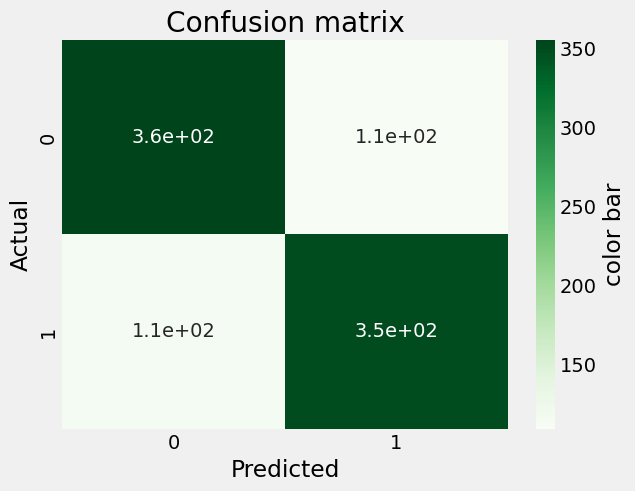

In [46]:
conf_matrix(y_valid,predic_under_forest)

In [47]:
#Guissiane Naive Bayes model
gnb_under = GaussianNB()
gnb_under.fit(X_train,y_train)
predic_under_GNB= gnb_under.predict(X_valid)
print(classification_report(y_valid,predic_under_GNB))

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       464
         1.0       0.73      0.70      0.71       463

    accuracy                           0.72       927
   macro avg       0.72      0.72      0.72       927
weighted avg       0.72      0.72      0.72       927



Confusion Matrix


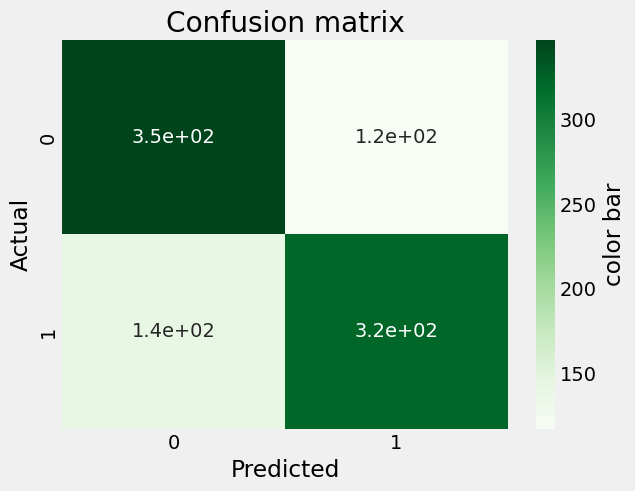

In [48]:
conf_matrix(y_valid,predic_under_GNB)

>Conclusion: What we see from our scores and confusion matrix we can say that the best model is **RandomForest**. Let's go to the next method of balancing **Oversampling** and will see what we have there

- In this step we will use a new method called **Pipeline** which will make our code more simply and less

In [49]:
#Here we will working with dataset what we made in previous steps, while we worked with "Undersampling" method

ds_class_1_over = ds_class_1.sample(count_class_0,replace=True)


ds_test_over = pd.concat([ds_class_1_over,ds_class_0],axis=0)
ds_test_over.Exited.value_counts()

1.0    7237
0.0    7237
Name: Exited, dtype: int64

In [50]:
#Creating our training and validation data sets
target = ds_test_over['Exited']
features = ds_test_over.drop('Exited', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=target
)

y_train.value_counts()

1.0    5428
0.0    5427
Name: Exited, dtype: int64

In [51]:
#Creating  our pipeline with our "DescisionTree" model
pipeline_dt = Pipeline([('standard1',StandardScaler()),
                        ('pca1', PCA(n_components = 2)),
                         ('dt_classifier',DecisionTreeClassifier(random_state=12345, max_depth=6))])

#Creating our pipeline with our "RandomForest" model
pipeline_rf = Pipeline([('standard2',StandardScaler()),
                        ('pca2', PCA(n_components = 2)),
                         ('rf_classifier',RandomForestClassifier(random_state=54321, n_estimators=14,max_depth=10))])

#Creating  our pipeline with our "GaussianNB" model
pipeline_nb = Pipeline([('standard3',StandardScaler()),
                        ('pca3', PCA(n_components = 2)),
                         ('nb_classifier',GaussianNB())])

In [52]:
#Creating a list of pipelines
pipelines = [pipeline_dt, pipeline_rf, pipeline_nb]
#Making a dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Decision Tree', 1:'Random Forest', 2:'Naive bayes'}
#Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [53]:
#After we fit our models we need to check what model has the higher rate of accuracy
best_accuracy = 0.0
best_classifier = 0
best_pipeline=" "
for i,model in enumerate(pipelines):
    if model.score(X_valid,y_valid)>best_accuracy:
        best_accuracy = model.score(X_valid,y_valid)
        best_pipeline = model
        best_classifier = i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Random Forest


In [54]:
#Testing our Random forest model with oversampling data sets

X_train_test, X_valid_test = standart(X_train,X_valid,numeric)
model_forest_over = RandomForestClassifier(random_state=54321, n_estimators=14,max_depth=10) # set number of trees
model_forest_over.fit(X_train_test,y_train)
predic_over_forest = model_forest_over.predict(X_valid_test)
print(classification_report(y_valid,predic_over_forest))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      1810
         1.0       0.85      0.87      0.86      1809

    accuracy                           0.86      3619
   macro avg       0.86      0.86      0.86      3619
weighted avg       0.86      0.86      0.86      3619



Confusion Matrix


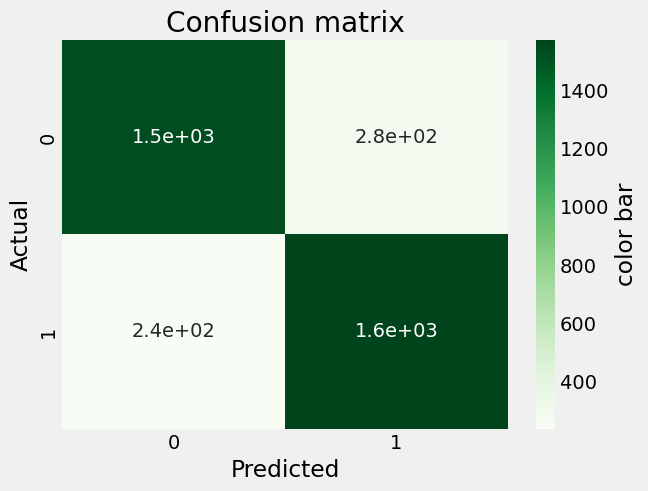

In [55]:
conf_matrix(y_valid,predic_over_forest)

>Concllusion: From these scores, we can see that oversampling brings us a higher rate of accuracy than oversampling. Let's use the last method of rebalancing **SMOTE**

In [56]:
#As usual, creating our datasets
features_sm= data_ordinal.drop('Exited',axis=1)
target_sm = data_ordinal['Exited']
smote = SMOTE(sampling_strategy = 'minority',random_state=12345)
X_sm,y_sm = smote.fit_resample(features_sm,target_sm)
y_sm.value_counts()

1.0    7237
0.0    7237
Name: Exited, dtype: int64

In [57]:
target_sm.shape

(9091,)

In [58]:
#Splitting them for the training and validation sets
X_train_sm, X_valid_sm, y_train_sm, y_valid_sm = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=12345, stratify=y_sm
)


In [59]:
#Working with our model with new data sets.
X_train_sm, X_valid_sm = standart(X_train_sm,X_valid_sm,numeric)
model_forest_sm = RandomForestClassifier(random_state=54321, n_estimators=14,max_depth=10) # set number of trees
model_forest_sm.fit(X_train_sm,y_train_sm)
predic_sm_forest = model_forest_sm.predict(X_valid_sm)
print(classification_report(y_valid,predic_over_forest))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      1810
         1.0       0.85      0.87      0.86      1809

    accuracy                           0.86      3619
   macro avg       0.86      0.86      0.86      3619
weighted avg       0.86      0.86      0.86      3619



Confusion Matrix


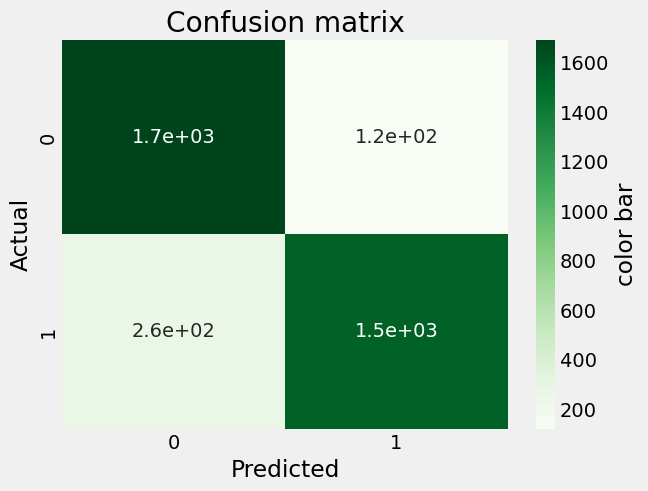

In [60]:
conf_matrix(y_valid_sm,predic_sm_forest)

> Conclusion: By the last two methods of rebalancing, we can see that we have equal scores, but from the confusion matrix, we see that in SMOTE method we have better results for a number of true positive and true negative values. That is why we can say in our project the best method of solving a problem with the balance of our classes is the **SMOTE** method which brings us lvl of accuracy equal to **0.86**.

**Step 3.2.Here we need to measure the AUC-ROC metric and compare it with the F1.**

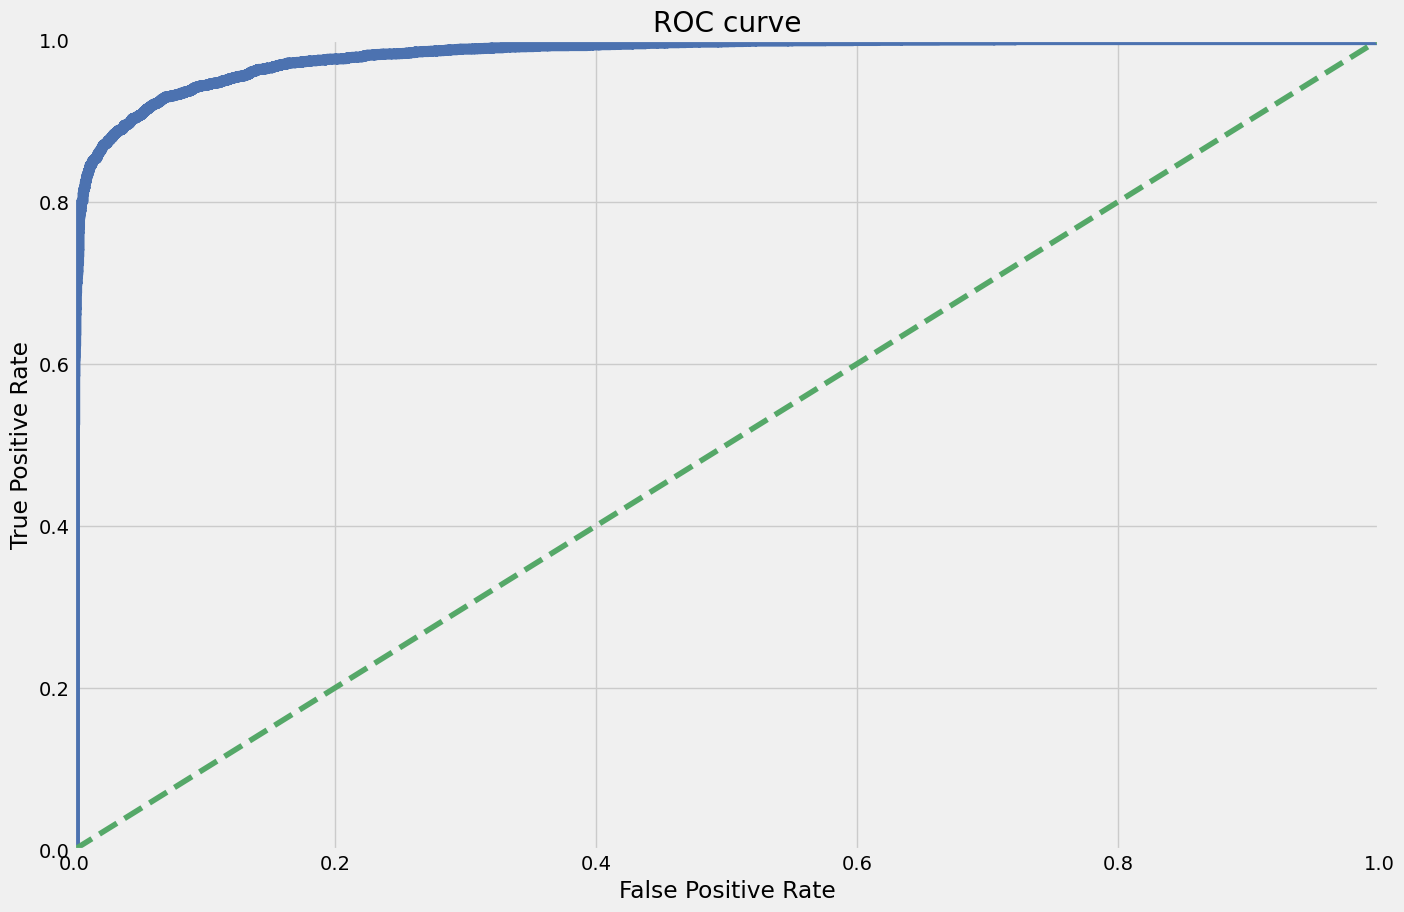


AUC_ROC score number is : 0.9821514238898579


In [74]:
#For this task we will use data sets that we made ins the "Smote" method of rebalancing classes
#And will use RandomForest model


model_forest_roc = RandomForestClassifier(random_state=54321, n_estimators=14,max_depth=10) # set number of trees
model_forest_roc.fit(X_train_sm,y_train_sm)
probabilities_valid = model_forest_roc.predict_proba(X_train_sm)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_sm,probabilities_one_valid)# < write code here >

# < plot the graph >
plt.figure(figsize=(15,10))
# ROC curve for random model (looks like a straight line)
plt.plot(fpr, tpr, label='Our model',linewidth =8)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random model')
# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
# < use the functions plt.xlabel() and plt.ylabel() to
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#   name the axes "False Positive Rate" and "True Positive Rate" >

# < add the heading "ROC curve" with the function plt.title() >
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(y_train_sm,probabilities_one_valid)
print()
print("AUC_ROC score number is :",auc_roc);


**Final Conclusion:**
- In our data we had 9% missing values in the Tenure column. The most probable reason for the missing values might be that these customers never reached maturation or due to technical reasons the values were not inputted. To prevent loss of data, missing values filled using the 'forward fill' method, where missing values were filled with the last observed value.

- We droped RowNumber, CustomerId, Surname columns  because they would not add any values for building a model.

- The whole dataset has been splitted into training, validation datasets with 0.8:0.2 ratios and columns containing numerical values have been scaled.

- The provided data was not balanced, where the percentage of customers who left the bank was around 20%. Three different models have been tested using the raw or imbalanced data, hyperparameters were tuned where applicable. Optimal F1 scores have been obtained as follow for each model:

- **DecisionTree => 0.85** with tree depth of 7;
- **RandomForest => 0.86** with forest size of 14 and tree depth of 10;
- **G.Naive Bayes model => 0.82.**

- Data has been balanced using three different approaches: 1)**Undersampling**. 2) **Oversampling**.3)**SMOTE**. Following F1 score values has been obtained:

|Approach|Undersampling|Oversampling|SMOTE|
|--------|------------|------------|------------------|
|Randomforest|0.76|0.84|0.86|

- **The highest F1 score of 0.0.86 has been obtained with RandomForest model** with **SMOTE** approach (forest size=14, tree depth=10)

- The final model has an **F1 score of 0.86** with the testing dataset. And its **AUC-ROC value is near 0.98** , which is close to 1 (perfect model). In summary, we can say that the built model can predict customers who will leave the bank with an F1 score of **0.86**. The age of customers was the most influencing factor in leaving the bank.